In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,Normalizer,LabelEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# 3. Feature Engineering

In [2]:
data = pd.read_csv('Cleaned_Insurance')

In [3]:
data

,Unnamed: 0,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,0,Western NY,Allegany,37.0,3,F,White,Not Span/Hispanic,4,Elective,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,1,Western NY,Allegany,37.0,5,F,White,Not Span/Hispanic,4,Urgent,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,2,Western NY,Allegany,37.0,3,F,White,Not Span/Hispanic,3,Urgent,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,3,Western NY,Allegany,37.0,1,F,White,Not Span/Hispanic,1,Urgent,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,4,Western NY,Allegany,37.0,5,F,White,Not Span/Hispanic,3,Elective,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026365,1048570,New York City,Bronx,1169.0,5,F,Other Race,Spanish/Hispanic,6,Emergency,...,3.0,Medical,0,N,Y,69650.41,13896.82,0.199522,1,3
1026366,1048571,New York City,Bronx,1169.0,1,F,Other Race,Not Span/Hispanic,2,Emergency,...,1.0,Medical,0,N,N,13587.38,3918.35,0.288382,1,3
1026367,1048572,New York City,Bronx,1169.0,4,M,Other Race,Spanish/Hispanic,13,Emergency,...,4.0,Medical,0,N,Y,104629.78,24746.64,0.236516,0,3
1026368,1048573,New York City,Bronx,1169.0,3,F,Black/African American,Not Span/Hispanic,2,Emergency,...,1.0,Surgical,0,N,Y,27521.41,6766.04,0.245846,1,3


In [4]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
data

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,3,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,5,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,3,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,1,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,5,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026365,New York City,Bronx,1169.0,5,F,Other Race,Spanish/Hispanic,6,Emergency,Skilled Nursing Home,...,3.0,Medical,0,N,Y,69650.41,13896.82,0.199522,1,3
1026366,New York City,Bronx,1169.0,1,F,Other Race,Not Span/Hispanic,2,Emergency,Home or Self Care,...,1.0,Medical,0,N,N,13587.38,3918.35,0.288382,1,3
1026367,New York City,Bronx,1169.0,4,M,Other Race,Spanish/Hispanic,13,Emergency,Medicare Cert Long Term Care Hospital,...,4.0,Medical,0,N,Y,104629.78,24746.64,0.236516,0,3
1026368,New York City,Bronx,1169.0,3,F,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,...,1.0,Surgical,0,N,Y,27521.41,6766.04,0.245846,1,3


## 3.1. Data Type Conversion 

In [6]:
data['Abortion'].value_counts()

N    1026370
Name: Abortion, dtype: int64

In [7]:
data['Cultural_group'].value_counts()

White                     767908
Black/African American    131268
Other Race                123569
Unknown                     3625
Name: Cultural_group, dtype: int64

In [8]:
data = data.replace({'Unknown':'Other Race'})

In [9]:
data['ethnicity'].value_counts()

Not Span/Hispanic    892113
Spanish/Hispanic      85053
Other Race            49204
Name: ethnicity, dtype: int64

In [10]:
data['Payment_Typology'].value_counts()

2    421518
1    337197
3    264224
4      3374
5        57
Name: Payment_Typology, dtype: int64

In [11]:
data = data[(data['Payment_Typology']!=5)&(data['Payment_Typology']!=4)]

In [12]:
data = data[data['Gender']!= 'U']

In [13]:
data['Admission_type'].value_counts()

Emergency        594662
Elective         231764
Urgent           108121
Newborn           85229
Trauma             2135
Not Available      1001
Name: Admission_type, dtype: int64

In [14]:
data = data[data['Admission_type']!='Not Available']

In [15]:
data = data.replace({'Trauma':'Urgent'})

In [16]:
data['Home or self care,'].value_counts()

Home or Self Care                        681324
Home w/ Home Health Services             128352
Skilled Nursing Home                     105069
Short-term Hospital                       20852
Expired                                   20753
Left Against Medical Advice               16865
Inpatient Rehabilitation Facility         15868
Psychiatric Hospital or Unit of Hosp       6462
Hospice - Medical Facility                 4640
Hospice - Home                             4590
Another Type Not Listed                    4422
Facility w/ Custodial/Supportive Care      3442
Court/Law Enforcement                      3199
Medicare Cert Long Term Care Hospital      1979
Hosp Basd Medicare Approved Swing Bed      1858
Cancer Center or Children's Hospital       1754
Federal Health Care Facility                445
Critical Access Hospital                     30
Medicaid Cert Nursing Facility                7
Name: Home or self care,, dtype: int64

In [17]:
data = data.replace({'Hospice - Home':'Home w/ Home Health Services',
                     'Hospice - Medical Facility':'Medical Facility',
                    'Medicaid Cert Nursing Facility':'Medical Facility',
                     'Critical Access Hospital':'Medical Facility',
                    'Federal Health Care Facility':'Medical Facility',
                     "Cancer Center or Children's Hospital":'Medical Facility',
                    'Hosp Basd Medicare Approved Swing Bed':'Medical Facility',
                     'Medicare Cert Long Term Care Hospital':'Medical Facility',
                     'Facility w/ Custodial/Supportive Care':'Medical Facility',
                     'Psychiatric Hospital or Unit of Hosp':'Medical Facility'})

In [18]:
data['Home or self care,'].value_counts()

Home or Self Care                    681324
Home w/ Home Health Services         132942
Skilled Nursing Home                 105069
Short-term Hospital                   20852
Expired                               20753
Medical Facility                      20617
Left Against Medical Advice           16865
Inpatient Rehabilitation Facility     15868
Another Type Not Listed                4422
Court/Law Enforcement                  3199
Name: Home or self care,, dtype: int64

In [19]:
data['Area_Service'].value_counts()

Hudson Valley      252827
Western NY         176664
Central NY         168659
Capital/Adirond    166727
Finger Lakes       154185
New York City       71352
Southern Tier       31497
Name: Area_Service, dtype: int64

In [20]:
np.sort(data['ccs_diagnosis_code'].unique())

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 19

In [21]:
np.sort(data['ccs_procedure_code'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 123, 124, 125, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

## 3.2. Removing Unnecessary Features

In [22]:
data3 = data

In [23]:
data = data.drop(['Area_Service','Admission_type','ethnicity','Hospital County', 'Hospital Id', 'Abortion','Home or self care,'],axis=1)

In [24]:
data.head()

,Age,Gender,Cultural_group,Days_spend_hsptl,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,3,F,White,4,122,0,Other pneumonia,1,1.0,Medical,0,Y,5511.95,5582.49,1.012798,1,1
1,5,F,White,4,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,Y,4783.20,5162.82,1.079365,1,1
2,3,F,White,3,122,0,Other pneumonia,1,1.0,Medical,0,Y,3829.15,4056.52,1.059379,1,1
3,1,F,White,1,122,0,Other pneumonia,1,1.0,Medical,0,Y,1108.20,1644.75,1.484167,0,1
4,5,F,White,3,122,0,Other pneumonia,2,3.0,Medical,0,Y,3418.18,3370.87,0.986161,1,1


## 3.3. Data Encoding


In [25]:
l_encoder = LabelEncoder()

In [26]:
t_encoder = TargetEncoder()

In [27]:
pd.set_option('display.max_columns',500)

In [28]:
data

,Age,Gender,Cultural_group,Days_spend_hsptl,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,3,F,White,4,122,0,Other pneumonia,1,1.0,Medical,0,Y,5511.95,5582.49,1.012798,1,1
1,5,F,White,4,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,Y,4783.20,5162.82,1.079365,1,1
2,3,F,White,3,122,0,Other pneumonia,1,1.0,Medical,0,Y,3829.15,4056.52,1.059379,1,1
3,1,F,White,1,122,0,Other pneumonia,1,1.0,Medical,0,Y,1108.20,1644.75,1.484167,0,1
4,5,F,White,3,122,0,Other pneumonia,2,3.0,Medical,0,Y,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026365,5,F,Other Race,6,106,29,Cardiac arrhythmia & conduction disorders,2,3.0,Medical,0,Y,69650.41,13896.82,0.199522,1,3
1026366,1,F,Other Race,2,8,231,Other infectious & parasitic diseases,2,1.0,Medical,0,N,13587.38,3918.35,0.288382,1,3
1026367,4,M,Other Race,13,151,88,Hepatic coma & other major acute liver disorders,4,4.0,Medical,0,Y,104629.78,24746.64,0.236516,0,3
1026368,3,F,Black/African American,2,143,86,"Inguinal, femoral & umbilical hernia procedures",1,1.0,Surgical,0,Y,27521.41,6766.04,0.245846,1,3


In [32]:
columns =['Gender','Cultural_group','apr_drg_description','Surg_Description', 'Emergency dept_yes/No']

In [33]:
def ecoder(x):
    for col in x:
        data[col] = l_encoder.fit_transform(data[col])


In [34]:
ecoder(columns)

In [35]:
data

,Age,Gender,Cultural_group,Days_spend_hsptl,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,3,0,2,4,122,0,237,1,1.0,0,0,1,5511.95,5582.49,1.012798,1,1
1,5,0,2,4,197,0,38,3,2.0,0,0,1,4783.20,5162.82,1.079365,1,1
2,3,0,2,3,122,0,237,1,1.0,0,0,1,3829.15,4056.52,1.059379,1,1
3,1,0,2,1,122,0,237,1,1.0,0,0,1,1108.20,1644.75,1.484167,0,1
4,5,0,2,3,122,0,237,2,3.0,0,0,1,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026365,5,0,1,6,106,29,28,2,3.0,0,0,1,69650.41,13896.82,0.199522,1,3
1026366,1,0,1,2,8,231,227,2,1.0,0,0,0,13587.38,3918.35,0.288382,1,3
1026367,4,1,1,13,151,88,99,4,4.0,0,0,1,104629.78,24746.64,0.236516,0,3
1026368,3,0,0,2,143,86,109,1,1.0,1,0,1,27521.41,6766.04,0.245846,1,3


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021911 entries, 0 to 1026369
Data columns (total 17 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Age                                    1021911 non-null  int64  
 1   Gender                                 1021911 non-null  int32  
 2   Cultural_group                         1021911 non-null  int32  
 3   Days_spend_hsptl                       1021911 non-null  int64  
 4   ccs_diagnosis_code                     1021911 non-null  int64  
 5   ccs_procedure_code                     1021911 non-null  int64  
 6   apr_drg_description                    1021911 non-null  int32  
 7   Code_illness                           1021911 non-null  int64  
 8   Mortality risk                         1021911 non-null  float64
 9   Surg_Description                       1021911 non-null  int32  
 10  Weight_baby                            102

## 3.4. Feature Selection

In [37]:
X = data.drop(['Result'],axis=1)
y = data['Result']

In [38]:
ext_model = ExtraTreeClassifier()
ext_model.fit(X,y)
ext_model.feature_importances_

array([1.86558690e-02, 8.91076263e-03, 1.80548215e-02, 9.42966844e-02,
       8.83913024e-02, 5.86977465e-02, 7.47729579e-02, 1.68295608e-02,
       1.45228554e-02, 3.78892958e-06, 1.55598301e-02, 6.34126510e-03,
       1.85429344e-01, 1.85388135e-01, 1.84177742e-01, 2.99673346e-02])

In [39]:
pd.DataFrame(ext_model.feature_importances_,X.columns).sort_values(by=0,ascending=False)

,0
Tot_charg,0.185429
Tot_cost,0.185388
ratio_of_total_costs_to_total_charges,0.184178
Days_spend_hsptl,0.094297
ccs_diagnosis_code,0.088391
apr_drg_description,0.074773
ccs_procedure_code,0.058698
Payment_Typology,0.029967
Age,0.018656
Cultural_group,0.018055


## 3.5. Balancing The Dataset

In [40]:
data = data.drop(['Surg_Description', 'Cultural_group'],axis=1)

In [41]:
data.rename(columns = {'Emergency dept_yes/No':'Emergency'}, inplace = True)

In [42]:
data.columns

Index(['Age', 'Gender', 'Days_spend_hsptl', 'ccs_diagnosis_code',
       'ccs_procedure_code', 'apr_drg_description', 'Code_illness',
       'Mortality risk', 'Weight_baby', 'Emergency', 'Tot_charg', 'Tot_cost',
       'ratio_of_total_costs_to_total_charges', 'Result', 'Payment_Typology'],
      dtype='object')

In [43]:
data['Emergency'].value_counts()

1    577808
0    444103
Name: Emergency, dtype: int64

In [44]:
X = data.drop('Result',axis=1)
y = data['Result']

In [45]:
from imblearn.over_sampling import SMOTE,RandomOverSampler

In [46]:
balancer = RandomOverSampler()

In [47]:
X,y = balancer.fit_resample(X,y)

In [48]:
y.value_counts()

1    765844
0    765844
Name: Result, dtype: int64

## 3.6. Normalizing The Dataset

In [49]:
scaler = Normalizer()
X = scaler.fit_transform(X)

In [50]:
np.round(X,4)

array([[4.000e-04, 0.000e+00, 5.000e-04, ..., 7.112e-01, 1.000e-04,
        1.000e-04],
       [7.000e-04, 0.000e+00, 6.000e-04, ..., 7.333e-01, 2.000e-04,
        1.000e-04],
       [5.000e-04, 0.000e+00, 5.000e-04, ..., 7.264e-01, 2.000e-04,
        2.000e-04],
       ...,
       [1.000e-04, 0.000e+00, 1.000e-04, ..., 1.775e-01, 0.000e+00,
        1.000e-04],
       [4.000e-04, 1.000e-04, 1.000e-04, ..., 2.843e-01, 0.000e+00,
        4.000e-04],
       [0.000e+00, 0.000e+00, 3.000e-04, ..., 2.496e-01, 0.000e+00,
        0.000e+00]])

In [51]:
len(X)

1531688

# 4. Model Building

## 4.1. Logistic Regression Model

In [52]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [53]:
lr_model = LogisticRegression()

In [54]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [55]:
lr_preds = lr_model.predict(X_test)
confusion_matrix(lr_preds,y_test)

array([[ 81958,  81997],
       [170771, 170732]], dtype=int64)

In [56]:
y_pred_train=lr_model.predict(X_train)

In [57]:
y_pred_test=lr_model.predict(X_test)

In [58]:
accuracy_score(y_train, y_pred_train)

0.5015064849010455

In [59]:
accuracy_score(y_test,y_pred_test)

0.49992284225395583

0.5015064849010455


Text(0, 0.5, 'True Positive Rate')

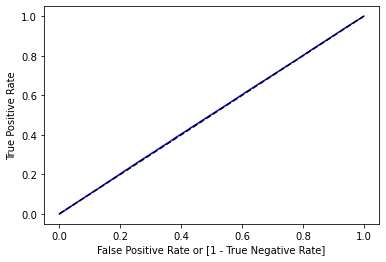

In [60]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y, lr_model.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='blue', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [61]:
print(classification_report(lr_preds,y_test))

              precision    recall  f1-score   support

           0       0.32      0.50      0.39    163955
           1       0.68      0.50      0.57    341503

    accuracy                           0.50    505458
   macro avg       0.50      0.50      0.48    505458
weighted avg       0.56      0.50      0.52    505458



## 4.2. Ensemble Models :  Random Forest & Decision Trees

## 4.2.1. Random Forest

In [62]:
rf_model = RandomForestClassifier()

In [63]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
preds = rf_model.predict(X_test)
confusion_matrix(preds,y_test)

array([[219764,  31094],
       [ 32965, 221635]], dtype=int64)

In [65]:
y_pred_train=rf_model.predict(X_train)

In [66]:
y_pred_test=rf_model.predict(X_test)

In [67]:
accuracy_score(y_test,y_pred_test)

0.8732654345168145

In [68]:
accuracy_score(y_train,y_pred_train)

0.9979156719253969

0.9979371096148038


Text(0, 0.5, 'True Positive Rate')

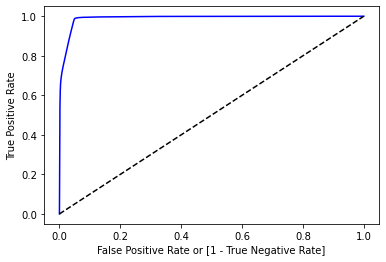

In [66]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y, rf_model.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='blue', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [67]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87    249916
           1       0.88      0.87      0.88    255542

    accuracy                           0.87    505458
   macro avg       0.87      0.87      0.87    505458
weighted avg       0.87      0.87      0.87    505458



## 4.2.2. Decision Tree

In [176]:
dt_model = DecisionTreeClassifier()

In [177]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [178]:
preds = dt_model.predict(X_test)
confusion_matrix(preds,y_test)

array([[227268,  80773],
       [ 25461, 171956]], dtype=int64)

In [179]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81    308041
           1       0.68      0.87      0.76    197417

    accuracy                           0.79    505458
   macro avg       0.79      0.80      0.79    505458
weighted avg       0.81      0.79      0.79    505458



## HyperParameter Tuning

In [93]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [48]:
params = {'max_depth':[3,4,8,20,50,80,100,110,120,130],
         'ccp_alpha':[0.00002,0.0001,0.0002,0.00001],
         'min_samples_leaf': [1,2,4,6,8,12,20],
         'min_samples_split': [1,2,4,6,8,12,16,22]}

In [94]:
param_2 = [0.00000000000121,0.0000000012,0.000000000012] 

In [107]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

In [95]:
tot_param2 = []
tot_score = []
def testing(model,y1):
        for y in y1:
                model = DecisionTreeClassifier(ccp_alpha=0.0000000012,)
                model.fit(X_train,y_train)
                predis = model.predict(X_test)
                score = accuracy_score(predis,y_test)
                tot_score.append(score)
                tot_param2.append(y)                                    

In [96]:
testing(dt_model,param_2)

In [97]:
print(tot_param2)
print('/n')
print(tot_score) #0.0000000001 best yet

[1.21e-12, 1.2e-09, 1.2e-11]
/n
[0.7901606797735389, 0.7905273237524841, 0.78995590521083]


In [52]:
RSCV = RandomizedSearchCV(estimator=dt_model,param_distributions=params,verbose=10)

In [53]:
len(X_train)

1041055

In [ ]:
RSCV.best_params_

In [ ]:
RSCV.best_score_

# 5. Deployment

In [69]:
import pickle

In [70]:
pickle.dump(rf_model,open('final_deployment.pkl','wb'))